In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing Required Libraries and Packages

In [ ]:
!pip install numpy==1.26.4 cartopy==0.24.1 shapely==2.0.4 pyproj==3.6.1 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np
import cartopy.crs as ccrs
import shapely.geometry as sgeom
import pyproj

print("✅ All imports successful.")
print("NumPy version:", np.__version__)

✅ All imports successful.
NumPy version: 2.0.2


In [ ]:
#Install all of the required packages
!pip install ai-models-gfs
!pip install ai-models-graphcast-gfs
!pip install ai-models-fourcastnetv2-gfs
!pip install ai-models-panguweather-gfs
!pip install ai-models-aurora-gfs
!pip install git+https://github.com/deepmind/graphcast.git
!pip install xarray pygrib awscli
!pip install basemap basemap-data-hires

#!pip install jax[tpu] // Uncomment if running models on a TPU runtime

#These are the imports needed for the rest of the notebook
import numpy as np
import xarray as xr
import pygrib as pg
import ipywidgets as widgets
import math
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.basemap import Basemap, shiftgrid
from IPython.display import HTML
from typing import Optional
from netCDF4 import Dataset as DS

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 15.5 MB/s eta 0:00:00
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=b28d8e62e612

# Downloading Model Assets

In [ ]:
!aws s3 cp --recursive --no-sign-request s3://noaa-oar-mlwp-data/colab_resources/fcnv2 ./fcnv2/

download: s3://noaa-oar-mlwp-data/colab_resources/fcnv2/global_means.npy to fcnv2/global_means.npy
download: s3://noaa-oar-mlwp-data/colab_resources/fcnv2/global_stds.npy to fcnv2/global_stds.npy
download: s3://noaa-oar-mlwp-data/colab_resources/fcnv2/weights.tar to fcnv2/weights.tar


In [ ]:
!pip install numpy==1.24.4 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
zarr 3.0.10 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
basemap 2.0.0 requires numpy<2.4,>=2.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
ope

# Fourcastnet Model

In [ ]:
# Input parameters
date = "20210601"
time = "0000"
model = "fourcastnetv2-small"
input_data = "gfs"
forecast_lead = "240"
output_path = f"./{model}_{date}_{time}"

assets = "./fcnv2"

# Run the model
!ai-models-gfs \
    --input {input_data} \
    --date {date} \
    --time {time} \
    --assets {assets} \
    --path {output_path} \
    --lead {forecast_lead} \
    {model}


2025-07-10 08:01:15,240 INFO Writing results to ./fourcastnetv2-small_20210601_0000
2025-07-10 08:01:15,241 INFO Loading ./fcnv2/global_means.npy
2025-07-10 08:01:15,241 INFO Loading ./fcnv2/global_stds.npy
2025-07-10 08:01:15,242 INFO Loading surface fields from GFS
2025-07-10 08:01:16,744 INFO Downloading https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210601/00/atmos/gfs.t00z.pgrb2.0p25.f000
2025-07-10 08:01:30,918 INFO Loading pressure fields from GFS
2025-07-10 08:01:52,256 INFO Using device 'CPU'. The speed of inference depends greatly on the device.
2025-07-10 08:02:10,827 INFO Starting date is 2021-06-01 00:00:00
2025-07-10 08:02:10,829 INFO Writing input fields
2025-07-10 08:02:13,792 INFO Writing step 0: 2 seconds.
2025-07-10 08:02:13,792 INFO Model initialisation: 58 seconds
2025-07-10 08:02:13,792 INFO Starting inference for 40 steps (240h).
/usr/local/lib/python3.11/dist-packages/ai_models_fourcastnetv2_gfs/fourcastnetv2/layers.py:623: FutureWarning: `torch.cuda.amp.autoca

# Converting into NetCDF File

In [ ]:
import numpy as np
import datetime
import pygrib as pg
from netCDF4 import Dataset as DS

def create_variable(f, name, dimensions, data, attrs, chunksizes):
    dtype = 'i4' if name in ['time', 'level'] else 'f4'
    var = f.createVariable(name, dtype, dimensions, compression='zlib', complevel=2, chunksizes=chunksizes)
    if data is not None:
        var[:] = data
    for attr_name, attr_value in attrs.items():
        var.setncattr(attr_name, attr_value)

def create_variable_nochunk(f, name, dimensions, data, attrs):
    dtype = 'i4' if name in ['time', 'level'] else 'f4'
    var = f.createVariable(name, dtype, dimensions, compression='zlib', complevel=2)
    var[:] = data
    for attr_name, attr_value in attrs.items():
        var.setncattr(attr_name, attr_value)

def grib2nc(model, path, lead, step, date, time, inputmodel):
    # Variable map for units and names
    varmap = {
        "t": ['Temperature', 'K'],
        "u": ['U component of wind', 'm s-1'],
        "v": ['V component of wind', 'm s-1'],
        "msl": ['Mean sea level pressure', 'Pa'],
        "sst": ['Sea surface temperature', 'K'],
        "tp": ['Total precipitation', 'm'],
    }

    # ERA5-style names expected from GRIB shortNames
    ec2era5 = {
        "t": "t", "u": "u", "v": "v", "msl": "msl", "sst": "sst", "tp": "tp"
    }

    with pg.open(path) as grib:
        y_shape, x_shape = grib[1].values.shape
        lats, lons = grib[1].latlons()
        lats = lats[:, 0]
        lons = lons[0, :]

        pl_vars = []
        sfc_vars = []
        levels = []

        for grb in grib:
            if grb.levelType == "pl":
                if grb.shortName in ec2era5 and grb.shortName in ["t", "u", "v"]:
                    if grb.level not in levels:
                        levels.append(grb.level)
                    if grb.shortName not in pl_vars:
                        pl_vars.append(grb.shortName)
            elif grb.shortName in ["msl", "sst", "tp"]:
                if grb.shortName not in sfc_vars:
                    sfc_vars.append(grb.shortName)

        levels = [lvl for lvl in sorted(levels, reverse=True) if lvl in [300,400,500,600,700,850,925,1000]]
        levelmap = {level: c for c, level in enumerate(levels)}

        f = DS(f"{path}.nc", 'w', format='NETCDF4')
        f.createDimension('time', lead // step + 1)
        f.createDimension('level', len(levels))
        f.createDimension('longitude', x_shape)
        f.createDimension('latitude', y_shape)

        initdt = datetime.datetime.strptime(f"{date}{time}", "%Y%m%d%H00")
        times = np.array([
            int((initdt + datetime.timedelta(hours=int(i))).timestamp())
            for i in np.arange(0, lead + step, step)
        ])
        create_variable_nochunk(f, 'time', ('time',), times, {
            'long_name': 'Date and Time', 'units': 'seconds since 1970-1-1', 'calendar': 'standard'
        })
        create_variable_nochunk(f, 'longitude', ('longitude',), lons, {'long_name': 'Longitude', 'units': 'degree'})
        create_variable_nochunk(f, 'latitude', ('latitude',), lats, {'long_name': 'Latitude', 'units': 'degree'})
        create_variable_nochunk(f, 'level', ('level',), np.array(levels), {'long_name': 'Pressure level', 'units': 'hPa'})

        for var in pl_vars + sfc_vars:
            name = ec2era5[var]
            dims = ('time', 'level', 'latitude', 'longitude') if var in pl_vars else ('time', 'latitude', 'longitude')
            chunksizes = (1, 1, y_shape, x_shape) if 'level' in dims else (1, y_shape, x_shape)
            create_variable(f, name, dims, None, {
                'long_name': varmap[name][0],
                'units': varmap[name][1]
            }, chunksizes)

        grib.seek(0)
        for grb in grib:
            shortName = grb.shortName
            levelType = grb.levelType
            if shortName not in ec2era5:
                continue
            name = ec2era5[shortName]
            timestep = int(grb.step / step)
            vals = grb.values
            if levelType == "pl" and grb.level in levelmap:
                lev = levelmap[grb.level]
                f.variables[name][timestep, lev, :, :] = vals
            elif levelType != "pl":
                f.variables[name][timestep, :, :] = vals

        # metadata
        f.Conventions = 'CF-1.8'
        f.model_name = model
        f.initialization_model = inputmodel
        f.initialization_time = initdt.strftime('%Y-%m-%dT%H:%M:%S')
        f.creation_time = datetime.datetime.utcnow().strftime('%Y-%m-%dT%H:%M:%S')
        f.close()
        print(f"✅ Saved NetCDF to: {path}.nc")


In [ ]:
!mv fourcastnetv2-small_20210601_0000 fourcastnetv2-small_20210601_0000.grib2


In [ ]:
grib2nc(
    model="fourcastnetv2-small",
    path="fourcastnetv2-small_20210601_0000.grib2",
    lead=240,
    step=6,
    date="20210601",
    time="0000",
    inputmodel="gfs"
)


✅ Saved NetCDF to: fourcastnetv2-small_20210601_0000.grib2.nc


# Loading Datasets

In [ ]:
import xarray as xr
ds_fc = xr.open_dataset("fourcastnetv2-small_20210601_0000.grib2.nc")

In [ ]:
import xarray as xr
ds_fc2 = "/content/drive/MyDrive/Fourcastnet/forecastnet_input_final.nc"
ds1 = xr.open_dataset(ds_fc2)

# Subsetting Datasets to India Region

In [ ]:
# Define India region
ds_fc_india = ds_fc.sel(latitude=slice(35, 5), longitude=slice(65, 100))
ds1_india = ds1.sel(latitude=slice(35, 5), longitude=slice(65, 100))


In [ ]:
# Interpolate ERA5 to ForecastNet times
msl_era5_interp = ds1_india["msl"].interp(valid_time=ds_fc_india.time)


In [ ]:
# Drop pressure_level if it exists
if "pressure_level" in msl_era5_interp.dims:
    msl_era5_interp = msl_era5_interp.isel(pressure_level=0, drop=True)


# Variable : Mean Sea Level Pressure (mslp)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

# Convert to hPa
msl_fc_hpa = ds_fc_india["msl"] / 100
msl_era5_hpa = msl_era5_interp / 100

# Drop pressure level if mistakenly included
if "pressure_level" in msl_era5_hpa.dims:
    msl_era5_hpa = msl_era5_hpa.isel(pressure_level=0, drop=True)

# Create plotting function
def plot_mslp_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          msl_fc_hpa.isel(time=time_idx), levels=20, cmap="viridis")
    axs[0].set_title(f"ForecastNet MSLP\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          msl_era5_hpa.isel(time=time_idx), levels=20, cmap="viridis")
    axs[1].set_title(f"ERA5 MSLP\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("Mean Sea Level Pressure (hPa)")

    plt.tight_layout()
    plt.show()

# Create interactive slider
interact(plot_mslp_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=40), Output()), _dom_classes=('widget-int…

# Variable : Temperature (t)

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Choose pressure level to visualize
level = 500

# Select temperature at 500 hPa
t_fc_500 = ds_fc_india["t"].sel(level=level)
t_era5_500 = ds1_india["t"].sel(pressure_level=level)

# Interpolate ERA5 time to match ForecastNet
t_era5_interp = t_era5_500.interp(valid_time=ds_fc_india.time)

# Interactive plotting function
def plot_temp_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet temp
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          t_fc_500.isel(time=time_idx), levels=20, cmap="plasma")
    axs[0].set_title(f"ForecastNet Temp @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 temp
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          t_era5_interp.isel(time=time_idx), levels=20, cmap="plasma")
    axs[1].set_title(f"ERA5 Temp @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("Temperature (K)")

    plt.tight_layout()
    plt.show()

# Interactive slider
interact(plot_temp_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=40), Output()), _dom_classes=('widget-int…

# Variable : U-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Select pressure level
level = 500

# Slice U wind at 500 hPa
u_fc_500 = ds_fc_india["u"].sel(level=level)
u_era5_500 = ds1_india["u"].sel(pressure_level=level)

# Interpolate ERA5 U-wind to ForecastNet time steps
u_era5_interp = u_era5_500.interp(valid_time=ds_fc_india.time)

# Define interactive plotting function
def plot_u_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet U-wind
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          u_fc_500.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[0].set_title(f"ForecastNet U-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 U-wind
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          u_era5_interp.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[1].set_title(f"ERA5 U-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("U Wind Component (m/s)")

    plt.tight_layout()
    plt.show()

# Interactive slider
interact(plot_u_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=40), Output()), _dom_classes=('widget-int…

# Variable : V-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Define pressure level
level = 500

# Slice the V wind data
v_fc_500 = ds_fc_india["v"].sel(level=level)
v_era5_500 = ds1_india["v"].sel(pressure_level=level)

# Interpolate ERA5 V wind to ForecastNet time
v_era5_interp = v_era5_500.interp(valid_time=ds_fc_india.time)

# Define plotting function
def plot_v_interactive(time_idx):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)

    # ForecastNet V wind
    cf1 = axs[0].contourf(ds_fc_india.longitude, ds_fc_india.latitude,
                          v_fc_500.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[0].set_title(f"ForecastNet V-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[0].set_xlabel("Longitude")
    axs[0].set_ylabel("Latitude")

    # ERA5 V wind
    cf2 = axs[1].contourf(ds1_india.longitude, ds1_india.latitude,
                          v_era5_interp.isel(time=time_idx), levels=20, cmap="coolwarm")
    axs[1].set_title(f"ERA5 V-Wind @ {level} hPa\n{str(ds_fc_india.time.values[time_idx])[:16]}")
    axs[1].set_xlabel("Longitude")

    # Shared colorbar
    cbar = fig.colorbar(cf1, ax=axs, orientation='horizontal', pad=0.08)
    cbar.set_label("V Wind Component (m/s)")

    plt.tight_layout()
    plt.show()

# Create interactive slider
interact(plot_v_interactive, time_idx=widgets.IntSlider(min=0, max=len(ds_fc_india.time)-1, step=1, value=0));


interactive(children=(IntSlider(value=0, description='time_idx', max=40), Output()), _dom_classes=('widget-int…

# RMSE Results

In [ ]:
import numpy as np
import xarray as xr

rmse_results = {}

# Temperature @ 500 hPa
t_fc = ds_fc["t"].sel(level=500)
t_era5 = ds1["t"].sel(pressure_level=500).interp(valid_time=ds_fc.time)
rmse_results["Temperature (K)"] = (((t_fc - t_era5) ** 2).mean(dim=["latitude", "longitude"])) ** 0.5

# U wind @ 500 hPa
u_fc = ds_fc["u"].sel(level=500)
u_era5 = ds1["u"].sel(pressure_level=500).interp(valid_time=ds_fc.time)
rmse_results["U Wind (m/s)"] = (((u_fc - u_era5) ** 2).mean(dim=["latitude", "longitude"])) ** 0.5

# V wind @ 500 hPa
v_fc = ds_fc["v"].sel(level=500)
v_era5 = ds1["v"].sel(pressure_level=500).interp(valid_time=ds_fc.time)
rmse_results["V Wind (m/s)"] = (((v_fc - v_era5) ** 2).mean(dim=["latitude", "longitude"])) ** 0.5

# MSLP (mean sea level pressure)
msl_fc = ds_fc["msl"]
msl_era5 = ds1["msl"]
if "valid_time" in msl_era5.dims:
    msl_era5 = msl_era5.interp(valid_time=ds_fc.time)
rmse_results["MSLP (hPa)"] = (((msl_fc - msl_era5) ** 2).mean(dim=["latitude", "longitude"])) ** 0.5 / 100  # convert Pa → hPa


In [ ]:
# Get reference length (e.g., from 'Temperature')
ref_len = len(rmse_results["Temperature (K)"])

# Force others to match by slicing
for key in rmse_results:
    rmse_results[key] = rmse_results[key].values.flatten()[:ref_len]


In [ ]:
# Forecast time
forecast_time = ds_fc["time"].values[:ref_len]

# Now build dataframe
rmse_df = pd.DataFrame(rmse_results)
rmse_df["Forecast Time"] = forecast_time
rmse_df = rmse_df.set_index("Forecast Time")
rmse_df

,Temperature (K),U Wind (m/s),V Wind (m/s),MSLP (hPa)
Forecast Time,,,,
2021-06-01 00:00:00,1.633047,4.604428,4.923812,6.770746
2021-06-01 06:00:00,1.401908,3.676972,4.021385,6.770746
2021-06-01 12:00:00,1.480447,4.058488,4.430555,6.770746
2021-06-01 18:00:00,1.639101,4.614280,4.986223,6.770746
2021-06-02 00:00:00,1.640600,4.605251,5.011039,6.770746
2021-06-02 06:00:00,1.428128,3.885436,4.234517,6.770746
2021-06-02 12:00:00,1.606495,4.242083,4.818582,6.770746
2021-06-02 18:00:00,1.830806,4.807811,5.623042,6.770746
2021-06-03 00:00:00,1.822931,4.917695,5.549398,5.625687


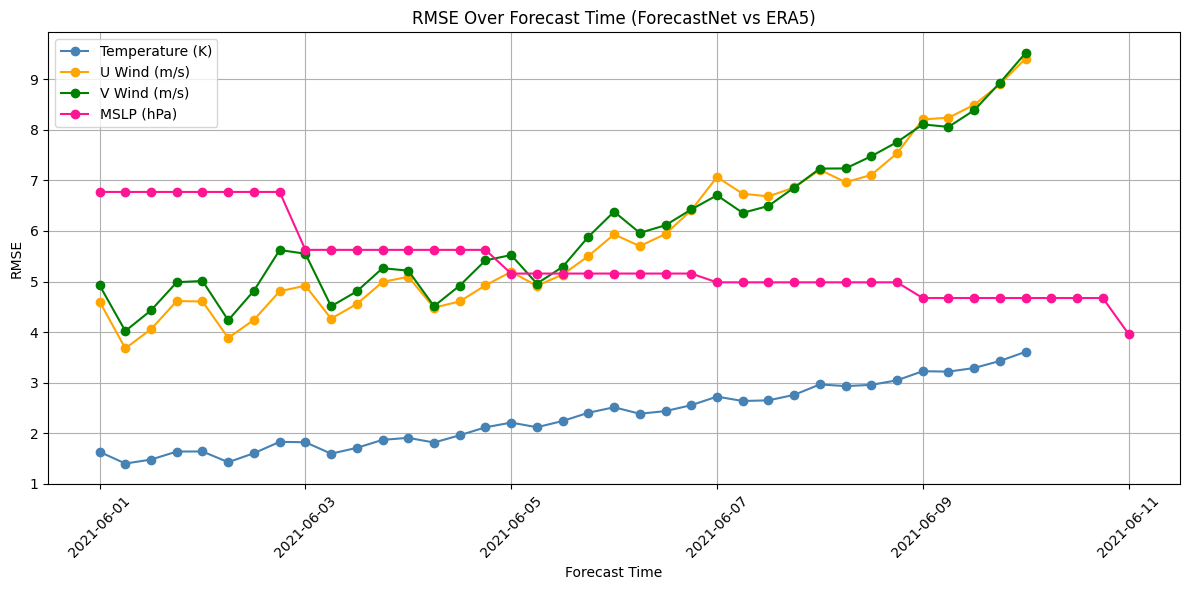

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each variable once
colors = {
    "Temperature (K)": "steelblue",
    "U Wind (m/s)": "orange",
    "V Wind (m/s)": "green",
    "MSLP (hPa)": "deeppink"  # Set custom color for MSLP
}

for var, rmse in rmse_results.items():
    plt.plot(ds_fc.time, rmse, label=var, marker='o', color=colors.get(var, None))

plt.title("RMSE Over Forecast Time (ForecastNet vs ERA5)")
plt.xlabel("Forecast Time")
plt.ylabel("RMSE")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
